In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

C:\Users\kolad\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the Olivetti Faces dataset with shuffling and a fixed random state
olivetti_faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
X, Y = olivetti_faces_data.data, olivetti_faces_data.target

In [10]:
# Split the data into training and temporary sets (80% training, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(
    olivetti_faces_data.data, olivetti_faces_data.target, test_size=0.2, random_state=42, stratify=olivetti_faces_data.target
)

# Split the temporary set into validation and test sets (50% validation, 50% test)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [4]:
# Create a Support Vector Machine classifier with a linear kernel and regularization parameter C=1
svm_classifier = SVC(kernel='linear', C=1)

# Define the number of folds for k-fold cross-validation
k_fold = 5

# Perform k-fold cross-validation on the training set and store the scores
cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=k_fold)

# Fit the SVM classifier to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels on the validation set
y_pred = svm_classifier.predict(X_valid)

# Calculate the accuracy of the classifier on the validation set
validation_accuracy = accuracy_score(y_valid, y_pred)

# Print the cross-validation scores and the validation accuracy
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Validation accuracy: {validation_accuracy}")

Cross-validation scores: [0.9375   0.9375   0.96875  0.96875  0.953125]
Validation accuracy: 0.95


In [5]:
# Define the number of clusters
n_clusters = 10

# Calculate pairwise Euclidean distances between data points
euclidean_distances = pairwise_distances(X, metric='euclidean')

# Create an Agglomerative Clustering model for Euclidean Distance
agglo_model_euclidean = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='precomputed')

# Fit the model and obtain cluster labels for Euclidean Distance
labels_euclidean = agglo_model_euclidean.fit(euclidean_distances)

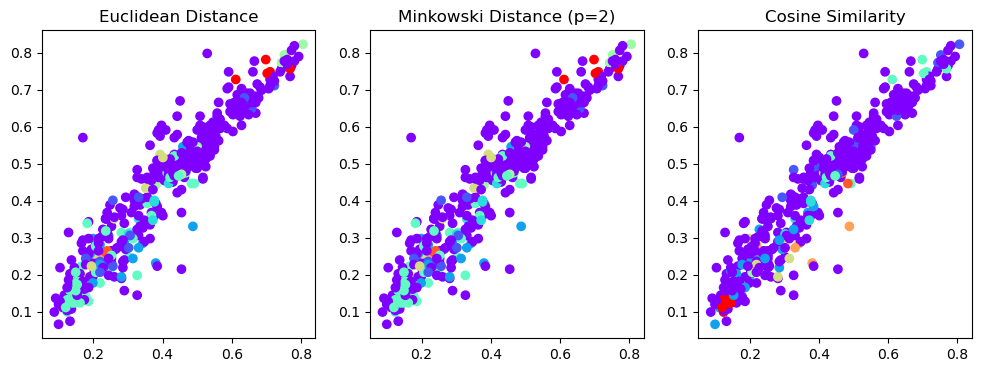

In [6]:
# Set the Minkowski Distance parameter (p) to 2
p = 2

# Calculate pairwise Minkowski distances between data points
minkowski_distances = pairwise_distances(X, metric='minkowski', p=p)

# Create an Agglomerative Clustering model for Minkowski Distance
agglo_model_minkowski = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='precomputed')

# Fit the model and obtain cluster labels for Minkowski Distance
agglo_model_minkowski.fit(minkowski_distances)

# Calculate pairwise Cosine Similarities between data points
cosine_distances = pairwise_distances(X, metric='cosine')

# Create an Agglomerative Clustering model for Cosine Similarity
agglo_model_cosine = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='precomputed')

# Fit the model and obtain cluster labels for Cosine Similarity
agglo_model_cosine.fit(cosine_distances)

# Create subplots to visualize the clustering results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title("Euclidean Distance")
plt.scatter(X[:, 0], X[:, 1], c=agglo_model_euclidean.labels_, cmap='rainbow')

plt.subplot(132)
plt.title(f"Minkowski Distance (p={p})")
plt.scatter(X[:, 0], X[:, 1], c=agglo_model_minkowski.labels_, cmap='rainbow')

plt.subplot(133)
plt.title("Cosine Similarity")
plt.scatter(X[:, 0], X[:, 1], c=agglo_model_cosine.labels_, cmap='rainbow')

# Display the plots
plt.show()

In [7]:
# List to store silhouette scores for different numbers of clusters
silhouette_scores = []

# Define a range of cluster numbers to try
cluster_range = range(2, 21)

# Compute silhouette scores for different numbers of clusters using Euclidean Distance
for n_clusters in cluster_range:
    agglo_model_euclidean = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='precomputed')
    labels_euclidean = agglo_model_euclidean.fit_predict(euclidean_distances)
    silhouette_avg_euclidean = silhouette_score(euclidean_distances, labels_euclidean)
    silhouette_scores.append(silhouette_avg_euclidean)

# Find the number of clusters with the highest silhouette score for Euclidean Distance
best_n_clusters_euclidean = cluster_range[np.argmax(silhouette_scores)]
best_silhouette_score_euclidean = max(silhouette_scores)

# Print the optimal number of clusters and best silhouette score for Euclidean Distance
print(f"Optimal number of clusters for Euclidean Distance: {best_n_clusters_euclidean}")
print(f"Best silhouette score for Euclidean Distance: {best_silhouette_score_euclidean}")

Optimal number of clusters for Euclidean Distance: 2
Best silhouette score for Euclidean Distance: 0.3709776997566223


In [8]:
# Reset the silhouette scores list
silhouette_scores = []

# Compute silhouette scores for different numbers of clusters using Minkowski Distance
for n_clusters in cluster_range:
    agglo_model_minkowski = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='precomputed')
    labels_minkowski = agglo_model_minkowski.fit_predict(minkowski_distances)
    silhouette_avg_minkowski = silhouette_score(minkowski_distances, labels_minkowski)
    silhouette_scores.append(silhouette_avg_minkowski)

# Find the number of clusters with the highest silhouette score for Minkowski Distance
best_n_clusters_minkowski = cluster_range[np.argmax(silhouette_scores)]
best_silhouette_score_minkowski = max(silhouette_scores)

# Print the optimal number of clusters and best silhouette score for Minkowski Distance
print(f"Optimal number of clusters for Minkowski Distance: {best_n_clusters_minkowski}")
print(f"Best silhouette score for Minkowski Distance: {best_silhouette_score_minkowski}")

Optimal number of clusters for Minkowski Distance: 2
Best silhouette score for Minkowski Distance: 0.3709776819107896


In [9]:
# Reset the silhouette scores list
silhouette_scores = []

# Compute silhouette scores for different numbers of clusters using Cosine Similarities
for n_clusters in cluster_range:
    agglo_model_cosine = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='precomputed')
    labels_cosine = agglo_model_cosine.fit_predict(cosine_distances)
    silhouette_avg_cosine = silhouette_score(cosine_distances, labels_cosine)
    silhouette_scores.append(silhouette_avg_cosine)

# Find the number of clusters with the highest silhouette score for Cosine Similarities
best_n_clusters_cosine = cluster_range[np.argmax(silhouette_scores)]
best_silhouette_score_cosine = max(silhouette_scores)

# Print the optimal number of clusters and best silhouette score for Cosine Similarities
print(f"Optimal number of clusters for Cosine Similarities: {best_n_clusters_cosine}")
print(f"Best silhouette score for Cosine Similarities: {best_silhouette_score_cosine}")

Optimal number of clusters for Cosine Similarities: 2
Best silhouette score for Cosine Similarities: 0.3925607204437256
